In [1]:
%matplotlib inline
print(__doc__)
import numpy as np
import cv2
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
import seaborn as sns; sns.set()

from scipy import stats


Automatically created module for IPython interactive environment


In [2]:
#pic = Image.open("test_image.jpg")
#pic.show()

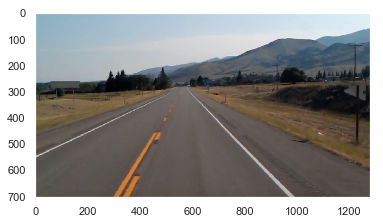

In [3]:
image = plt.imread("test_image.jpg")
#lanePrac = load_sample_image(image)
#lanePrac.dtype()
plt.imshow(image)
plt.grid(False);

In [4]:
image.shape

(704, 1279, 4)

In [5]:
704*1279

900416

In [6]:
X = (image).reshape(-1, 4)
X

array([[ 75,  91, 116, 255],
       [134, 174, 194, 255],
       [134, 174, 194, 255],
       ...,
       [ 81,  73,  72, 255],
       [ 81,  73,  72, 255],
       [ 81,  73,  72, 255]], dtype=uint8)

In [7]:
X.shape

(900416, 4)

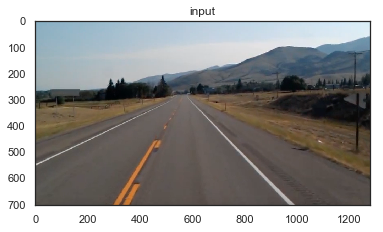

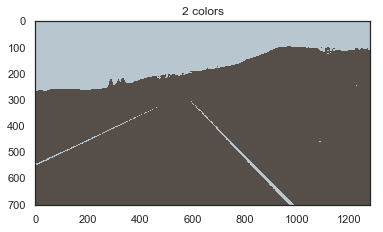

In [8]:
imaPrac = image
n_colors = 2

X = (imaPrac).reshape(-1, 4)
    
model = KMeans(
            n_colors, 
            max_iter=300, 
            n_jobs=-1, 
            n_init = 10, 
            #init = 'random'
        )
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(imaPrac.shape)
new_image = (new_image).astype(np.uint8)

# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))

In [9]:
def canny(image):
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GausianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

In [10]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, triangle, 255)
    return mask

In [11]:
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cv2.imshow("result", regipn_of_interest(canny))
cv2.waitKey(0)

AttributeError: module 'cv2.cv2' has no attribute 'GausianBlur'